# 846 Companies Ranked (2021) - Big FAANG vs. Big MAMA vs. Everyone Else

The dataset used this notebook includes the rankings of the 846 most valuable and effective US companies whose shares are traded on the New York Stock Exchange or Nasdaq. This notebook seeks to find relationships between customer satisfaction, employee satisfaction, financial strength, social responsibility, and overall company effectiveness. Additionally, this notebook seeks to find if the biggest companies (Big Tech) are better than every company in all aspects. The tools used here include Numpy, Pandas, Matplotlib, and Seaborn.

The dataset used can be found here: https://www.kaggle.com/axeltorbenson/846-companies-ranked

The dataset's source is here: https://www.drucker.institute/2021-drucker-institute-company-ranking/

## Downloading the Dataset

To use the dataset, first import Jovian and retrieve the .csv file.

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

In [ ]:
# Change this
dataset_url = 'https://www.kaggle.com/axeltorbenson/846-companies-ranked' 

In [ ]:
import opendatasets as od
od.download(dataset_url)

Downloading the dataset through url appears to be unauthorized, therefore the .csv file was downloaded and uploaded to the Jupyter notebook

Let us save and upload our work to Jovian before continuing.

In [4]:
project_name = "zerotopandas-846-companies-ranked-2021"

In [5]:
!pip install jovian --upgrade -q

In [6]:
import jovian

In [8]:
jovian.commit(project=project_name, files=['drucker_inst_company_rankings.csv'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jonathan-k-lee9/zerotopandas-846-companies-ranked-2021" on https://jovian.ai
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/jonathan-k-lee9/zerotopandas-846-companies-ranked-2021


'https://jovian.ai/jonathan-k-lee9/zerotopandas-846-companies-ranked-2021'

## Data Preparation and Cleaning

The dataset uses a different encoding, and can not be read by the 'UTF-8' codec.



In [9]:
import pandas as pd

In [10]:
companies_df = pd.read_csv('drucker_inst_company_rankings.csv', encoding='mac_roman')

In [11]:
companies_df

ranking                      company  customer_satisfaction  \
0          1               Microsoft Corp                   55.4   
1          2               Amazon.com Inc                   53.6   
2          3                    Apple Inc                   57.2   
3          4  Intl Business Machines Corp                   75.4   
4          5                   Intel Corp                   62.3   
..       ...                          ...                    ...   
841      842             Altice USA Inc-A                   13.0   
842      843            Cabot Oil & Gas A                   29.9   
843      844   Sinclair Broadcast Group A                   35.0   
844      845               CVR Energy Inc                   30.6   
845      846                      GMS Inc                   40.8   

     employee_engagement_and_development  innovation  social_responsibility  \
0                                   72.7       136.2                   75.4   
1                                   53.9       155.0                   50.2   
2                                   62.2       111.8                   67.0   
3                                   53.4       115.6                   68.9   
4                                   60.5        84.9                   75.8   
..                                   ...         ...                    ...   
841                                 31.7        47.4                   34.5   
842                                 19.4        41.7                   38.6   
843                                 29.1        44.4                   31.1   
844                                 26.4        40.2                   32.9   
845                                  3.0        42.1                   35.4   

     financial_strength  effectiveness  
0                  88.6          105.5  
1                  77.5           94.3  
2                  89.3           91.6  
3                  54.1           88.9  
4                  71.6           82.9  
..                  ...            ...  
841                48.8           26.9  
842                43.7           26.8  
843                31.7           26.7  
844                40.5           25.7  
845                47.1           24.9  

[846 rows x 8 columns]

In [8]:
companies_df.shape

(846, 8)

In [9]:
companies_df.isna().any().any()

False

Based on the isna() function, there are no missing values in the dataset.

In [19]:
companiesTop10 = companies_df.head(10)
companiesTop10

ranking                      company  customer_satisfaction  \
0        1               Microsoft Corp                   55.4   
1        2               Amazon.com Inc                   53.6   
2        3                    Apple Inc                   57.2   
3        4  Intl Business Machines Corp                   75.4   
4        5                   Intel Corp                   62.3   
5        6                  Nvidia Corp                   73.3   
6        7            Johnson & Johnson                   55.8   
7        8            Cisco Systems Inc                   77.7   
8        9             Procter & Gamble                   70.4   
9       10                       HP Inc                   69.7   

   employee_engagement_and_development  innovation  social_responsibility  \
0                                 72.7       136.2                   75.4   
1                                 53.9       155.0                   50.2   
2                                 62.2       111.8                   67.0   
3                                 53.4       115.6                   68.9   
4                                 60.5        84.9                   75.8   
5                                 76.5        65.9                   65.2   
6                                 64.9        90.8                   66.9   
7                                 66.7        68.7                   72.6   
8                                 66.1        78.1                   62.0   
9                                 62.5        61.5                   79.2   

   financial_strength  effectiveness  
0                88.6          105.5  
1                77.5           94.3  
2                89.3           91.6  
3                54.1           88.9  
4                71.6           82.9  
5                76.0           81.1  
6                71.4           80.9  
7                62.8           80.5  
8                73.3           79.7  
9                65.4           77.5

Here are the top 10 companies, ranked by overall effectiveness.

Overall effectiveness was weighed by the Drucker Institute as follows: "Those weights were as follows: Customer Satisfaction = 19%; Employee Engagement and Development = 19%; Innovation = 23%; Social Responsibility = 25%; and Financial Strength = 14%". 

Source: https://www.drucker.institute/2021-methodology-for-the-drucker-institutes-company-rankings/

## Exploratory Analysis and Visualization

Let's explore the mean, sum, range and other interesting findings for this dataset.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (20, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [79]:
companies_df.describe()

ranking  customer_satisfaction  employee_engagement_and_development  \
count  846.000000             846.000000                           846.000000   
mean   422.232861              50.129669                            49.929787   
std    244.221752               9.824823                             9.913625   
min      1.000000              13.000000                             3.000000   
25%    212.000000              44.000000                            43.500000   
50%    422.000000              50.000000                            50.500000   
75%    634.000000              56.700000                            56.800000   
max    846.000000              77.700000                            76.500000   

       innovation  social_responsibility  financial_strength  effectiveness  
count  846.000000             846.000000          846.000000     846.000000  
mean    50.167730              50.383924           50.202364      50.251773  
std     10.144752               9.943948            9.866328       9.992815  
min     37.100000              30.200000           15.200000      24.900000  
25%     44.400000              42.500000           45.100000      43.400000  
50%     47.600000              49.700000           48.800000      48.900000  
75%     51.875000              58.550000           54.875000      56.100000  
max    155.000000              79.200000           89.300000     105.500000

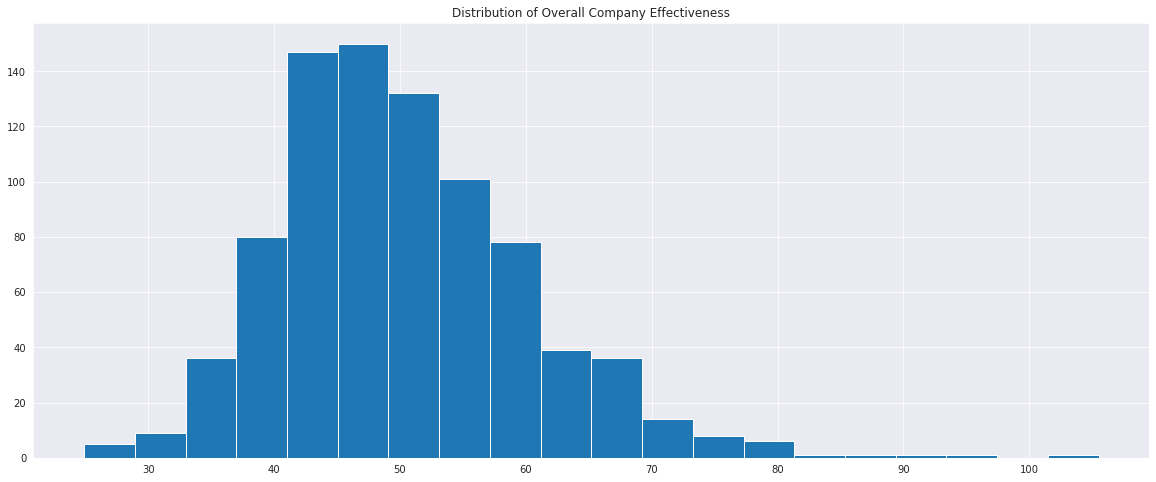

In [16]:
plt.title("Distribution of Overall Company Effectiveness")
plt.hist(companies_df.effectiveness, bins=20);

We can see from the describe() function and the histogram, the average effectiveness of all the companies is roughly 50. From the histogram we can see some companies receiving an overall effectiveness score below 40, some above 80, with a few all the way beyond 100. This data suggests the average number of companies can have a mid level score of performance, but yet can still be worth billions of dollars (the companies here are all listed on the New York Stock Exchange and Nasdaq).

In [28]:
financialStrengthTop10 = companies_df.sort_values(by='financial_strength', axis=0, ascending=False).head(10)
financialStrengthTop10

ranking                     company  customer_satisfaction  \
2          3                   Apple Inc                   57.2   
0          1              Microsoft Corp                   55.4   
826      827                Ubiquiti Inc                   26.1   
12        13              Alphabet Inc C                   54.0   
31        31          Meta Platforms Inc                   27.3   
24        25      Advanced Micro Devices                   60.0   
52        52              Home Depot Inc                   50.9   
271      271                Moderna, Inc                   44.1   
560      561        Berkshire Hathaway B                   47.4   
322      323  Bio-Rad Laboratories Inc A                   60.2   

     employee_engagement_and_development  innovation  social_responsibility  \
2                                   62.2       111.8                   67.0   
0                                   72.7       136.2                   75.4   
826                                 21.9        43.3                   32.6   
12                                  55.5        81.6                   63.8   
31                                  67.9        81.7                   57.0   
24                                  65.6        55.4                   63.1   
52                                  51.6        64.3                   62.0   
271                                 61.3        47.9                   39.2   
560                                 29.8        56.8                   31.7   
322                                 40.7        45.5                   42.3   

     financial_strength  effectiveness  
2                  89.3           91.6  
0                  88.6          105.5  
826                85.3           33.6  
12                 84.5           76.1  
31                 84.4           69.4  
24                 81.8           70.9  
52                 81.7           66.9  
271                81.4           53.5  
560                80.1           45.3  
322                78.5           51.9

Above is a table of the top 10 companies for financial strength. An interesting finding is seeing Moderna Inc, as with its role in the pandemic has likely boosted its financial strength. Surprisingly, Home Depot  Inc holds a strong score of financial strength, beating out larger companies like Amazon. This may possibly be due to a surge in lumber demand, DIY projects, or real estate demand caused by the pandemic.

In [29]:
innovationTop10 = companies_df.sort_values(by='innovation', axis=0, ascending=False).head(10)
innovationTop10

ranking                      company  customer_satisfaction  \
1          2               Amazon.com Inc                   53.6   
0          1               Microsoft Corp                   55.4   
3          4  Intl Business Machines Corp                   75.4   
2          3                    Apple Inc                   57.2   
16        17                  Equinix Inc                   59.9   
18        19        Capital One Financial                   52.0   
6          7            Johnson & Johnson                   55.8   
59        59                  Walmart Inc                   51.2   
162      163        Uber Technologies Inc                   49.2   
4          5                   Intel Corp                   62.3   

     employee_engagement_and_development  innovation  social_responsibility  \
1                                   53.9       155.0                   50.2   
0                                   72.7       136.2                   75.4   
3                                   53.4       115.6                   68.9   
2                                   62.2       111.8                   67.0   
16                                  64.4        97.5                   56.4   
18                                  62.9        92.8                   57.0   
6                                   64.9        90.8                   66.9   
59                                  41.4        88.2                   54.2   
162                                 56.0        85.0                   42.8   
4                                   60.5        84.9                   75.8   

     financial_strength  effectiveness  
1                  77.5           94.3  
0                  88.6          105.5  
3                  54.1           88.9  
2                  89.3           91.6  
16                 45.8           74.9  
18                 57.9           73.3  
6                  71.4           80.9  
59                 67.4           66.3  
162                38.1           58.4  
4                  71.6           82.9

Above is a table for the top 10 innovative companies. Another surprising finding is IBM holding an innovation score roughly 4 points higher than Apple. This could be because of IBM Watson, IBM's AI system. Surprisingly, Capital One Financial, Johnson & Johnson, Walmart Inc, and Uber Technologies Inc all hold strong innovation scores. It is surprising to not see Tesla Inc. among the top 10 innovative companies, as the data collected from the source is up to date to June 30, 2021. 

Source: https://www.drucker.institute/2021-methodology-for-the-drucker-institutes-company-rankings/


In [36]:
Tesla = companies_df.loc[companies_df['company'] == 'Tesla, Inc']
Tesla

ranking     company  customer_satisfaction  \
251      249  Tesla, Inc                   57.1   

     employee_engagement_and_development  innovation  social_responsibility  \
251                                 53.5        54.9                   40.8   

     financial_strength  effectiveness  
251                64.2           54.3

Tesla's innovation score and overall effectiveness score are roughly 54. Based on the data seen from the describe() function from before, the average scores for all 846 companies are around 50. This data shows Tesla scoring close to the mean, and this finding surprisingly suggests Tesla is an "average" company compared to all the other companies for 2021.

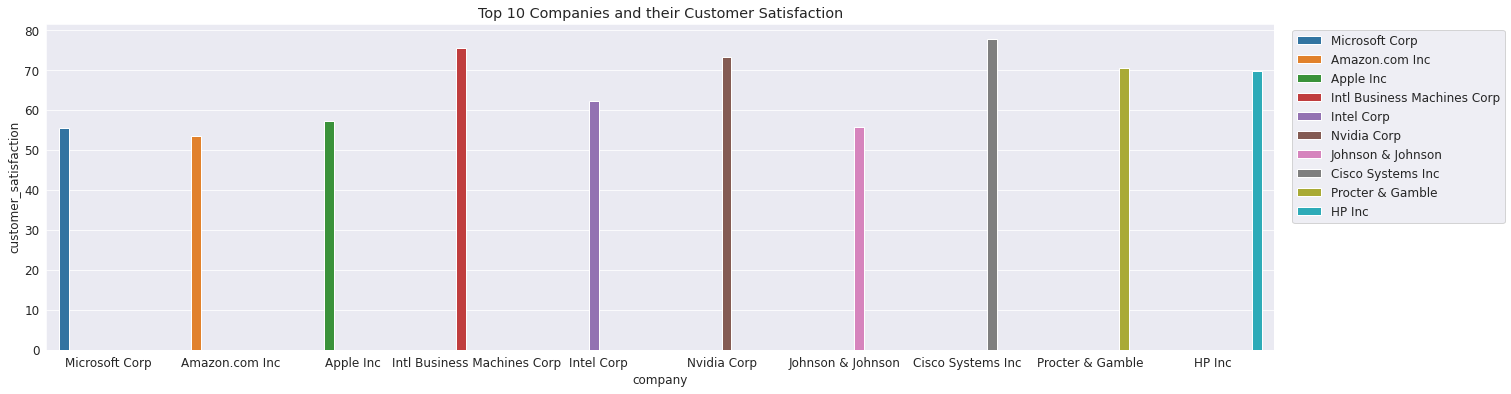

In [175]:
plt.figure(figsize=(22, 6))

sns.barplot(x = 'company', 
                y = 'customer_satisfaction', 
                hue = 'company', 
                data = companiesTop10)

plt.title('Top 10 Companies and their Customer Satisfaction')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.5)

Based on the bar chart above, among the top 10 companies overall, Cisco Systems, IBM (International Business Machines) Corp, and Nvidia have the top 3 highest overall customer satisfaction respectively. Surprisingly, none of the top FAANG/MAMA tech companies were in the top 3 highest customer satisfaction among the top 10 companies. (Note: MAMA stands for Meta, Amazon, Microsoft, Apple)

## Asking and Answering Questions

After discovering some interesting findings, let's explore the relationships between the different scores and how  the top tech companies (FAANG/MAMA) stack up.



#### Q1:  Is there a trend or correlation between the customer satisfaction rating and the employee engagement and development rating?

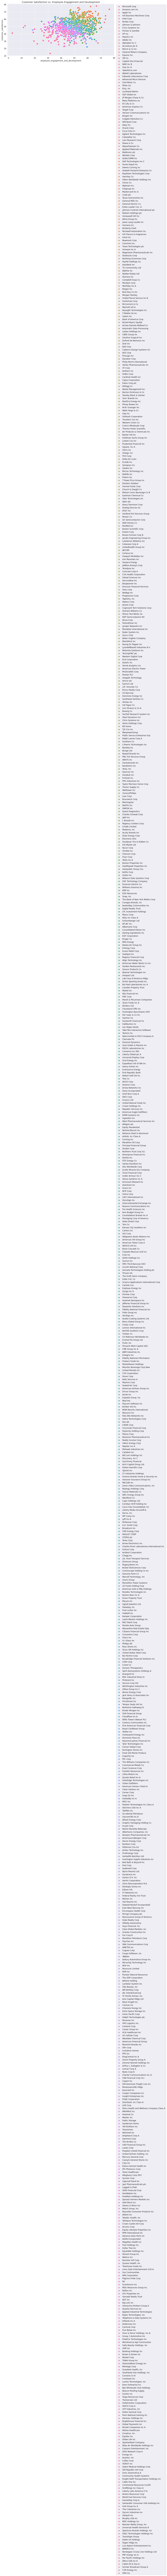

In [183]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x=companies_df.employee_engagement_and_development, 
                y=companies_df.customer_satisfaction, 
                hue=companies_df.company,
                s=100);

plt.title('Customer Satisfaction vs. Employee Engagement and Development')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.5)

Based on the scatter plot chart above, among the majority of the companies, there is a general trend where companies with higher customer satisfaction also have higher employee engagement and development. Take note, most of the pink dots in the left bottom corner of the cluster are the companies at the bottom of the long legend list, and the red dots in the top right corner are the top companies of the legend (with the highest overall effectiveness as a company). 

This finding shows that generally when employees are more engaged and developed in their careers, customer satisfaction increases. In other words, when employees are happier, customers are happier too.

#### Q2: Do companies with a higher customer satisfaction rating have a higher social responsibility rating?

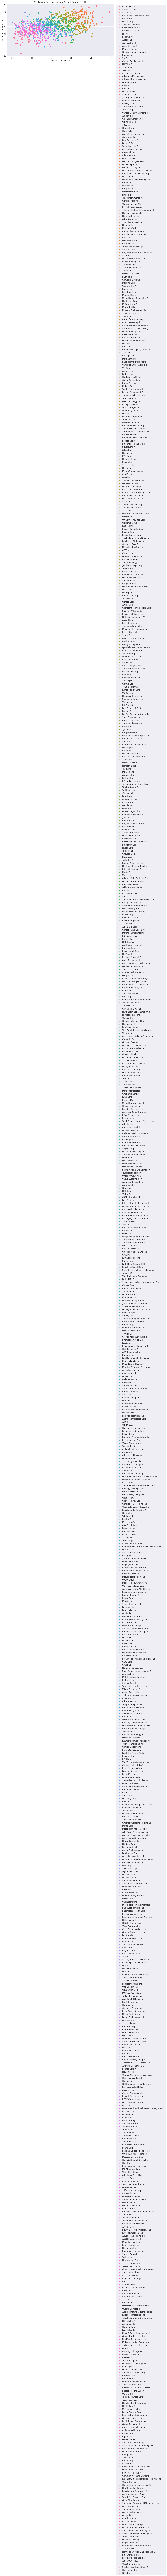

In [186]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x=companies_df.social_responsibility, 
                y=companies_df.customer_satisfaction, 
                hue=companies_df.company,
                s=100);

plt.title('Customer Satisfaction vs. Social Responsibility')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.5)

Based on the chart above, the companies with the highest customer satisfaction (red dots at the top right) tend to have the higher social responsibility score. The definition of social responsibility is to prioritize what is good in the public's interest, according to the source of this dataset: https://www.drucker.institute/principles-underlying-the-drucker-institutes-company-rankings/

Another finding in this chart is that some companies with a lower social responsibility score still have a relatively higher customer satisfaction score than some other companies, particularly in the blue, purple, pink cluster.

In summary, companies who care more about social responsibility have more satisfied customers, but it is also possible to have a lower social responsibility score but still have some relatively higher customer satisfaction.

#### Q3: Which companies have an employee engagement and development score over 70?

In [218]:
high_employee_score =  companies_df.employee_engagement_and_development > 70
high_employee_score_companies = companies_df[high_employee_score]
high_employee_score_companies

ranking                company  customer_satisfaction  \
0          1         Microsoft Corp                   55.4   
5          6            Nvidia Corp                   73.3   
11        12              Adobe Inc                   59.8   
21        22         Salesforce.com                   64.4   
323      323  Camden Property Trust                   48.8   

     employee_engagement_and_development  innovation  social_responsibility  \
0                                   72.7       136.2                   75.4   
5                                   76.5        65.9                   65.2   
11                                  73.5        65.4                   70.3   
21                                  73.6        67.8                   63.1   
323                                 70.5        46.6                   46.7   

     financial_strength  effectiveness  
0                  88.6          105.5  
5                  76.0           81.1  
11                 67.9           76.3  
21                 50.4           72.1  
323                43.8           51.9

Out of the top 846 companies, only 5 have an employee engagement and development score over 70. These five are Microsoft, Nvidia, Adobe, Salesforce, and Camden Property Trust, in order of effectiveness. If a person wanted to work at a company only focused on career growth, these fives companies could be good places to work depending on the career path. Out of all the FAANG/MAMA companies, only Microsoft is present here. 

#### Q4: Aside from effectiveness, which two variables/scores have the strongest correlation?

In [47]:
correlation = companies_df.iloc[:,2:7].corr()
correlation

customer_satisfaction  \
customer_satisfaction                             1.000000   
employee_engagement_and_development               0.244368   
innovation                                        0.252229   
social_responsibility                             0.409333   
financial_strength                                0.102780   

                                     employee_engagement_and_development  \
customer_satisfaction                                           0.244368   
employee_engagement_and_development                             1.000000   
innovation                                                      0.254290   
social_responsibility                                           0.401448   
financial_strength                                              0.130873   

                                     innovation  social_responsibility  \
customer_satisfaction                  0.252229               0.409333   
employee_engagement_and_development    0.254290               0.401448   
innovation                             1.000000               0.449708   
social_responsibility                  0.449708               1.000000   
financial_strength                     0.311757               0.165344   

                                     financial_strength  
customer_satisfaction                          0.102780  
employee_engagement_and_development            0.130873  
innovation                                     0.311757  
social_responsibility                          0.165344  
financial_strength                             1.000000

<AxesSubplot:>

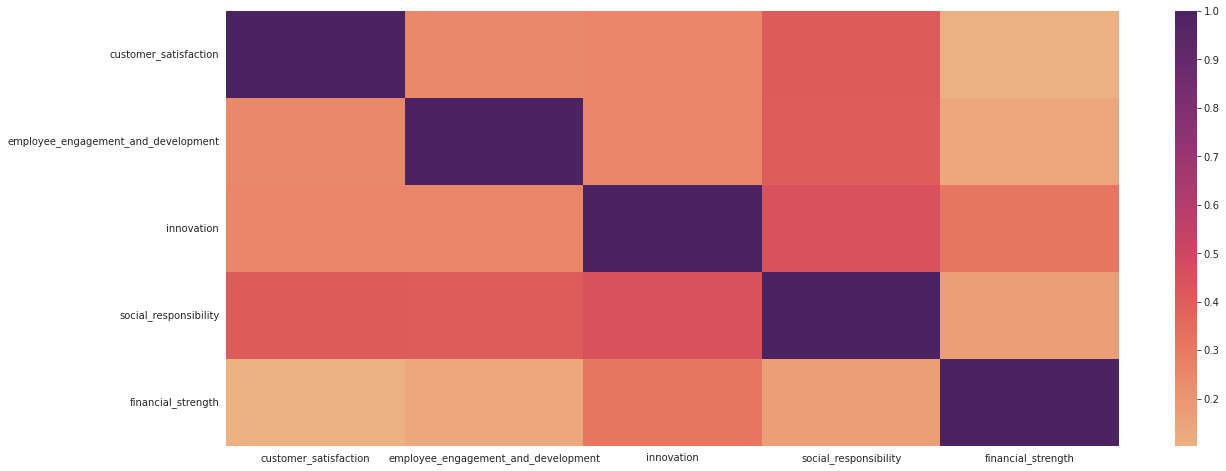

In [48]:
sns.heatmap(correlation, cmap="flare")

Out of all the 5 scoring criteria, the heatmap shows social responsibility and innovation having the strongest correlation. This finding suggests companies who care more about social responsibility are more innovative or have more innovative solutions. The weakest correlation in the heatmap is financial strength and customer satisfaction. This finding suggests how well a company is doing financially may not impact how satisfied customers are with the company itself. 

(Note: Effectiveness was not analyzed here because the correlated weighting factors are described in the source here: https://www.drucker.institute/2021-methodology-for-the-drucker-institutes-company-rankings/

"Customer Satisfaction = 19%; Employee Engagement and Development = 19%; Innovation = 23%; Social Responsibility = 25%; and Financial Strength = 14%"

The heatmap including effectiveness would show Financial Strength as the lightest and Social Responsibility the darkest for correlation with effectiveness. What this means is the heatmap including effectiveness would show social responsibility as the strongest correlation to effectiveness, but this is already visible by viewing the weighting factors)

#### Q5: Out of all the FAANG/MAMA companies, which companies have the highest scores in each category?

In [49]:
Meta = companies_df.loc[companies_df['company'] == 'Meta Platforms Inc']
Amazon = companies_df.loc[companies_df['company'] == 'Amazon.com Inc']
Apple = companies_df.loc[companies_df['company'] == 'Apple Inc']
Netflix = companies_df.loc[companies_df['company'] == 'NetFlix Inc']
Google = companies_df.loc[companies_df['company'] == 'Alphabet Inc C']
Microsoft = companies_df.loc[companies_df['company'] == 'Microsoft Corp']

MAANGM = [Meta, Amazon, Apple, Netflix, Google, Microsoft]
MAANGM

[    ranking             company  customer_satisfaction  \
 31       31  Meta Platforms Inc                   27.3   
 
     employee_engagement_and_development  innovation  social_responsibility  \
 31                                 67.9        81.7                   57.0   
 
     financial_strength  effectiveness  
 31                84.4           69.4  ,
    ranking         company  customer_satisfaction  \
 1        2  Amazon.com Inc                   53.6   
 
    employee_engagement_and_development  innovation  social_responsibility  \
 1                                 53.9       155.0                   50.2   
 
    financial_strength  effectiveness  
 1                77.5           94.3  ,
    ranking    company  customer_satisfaction  \
 2        3  Apple Inc                   57.2   
 
    employee_engagement_and_development  innovation  social_responsibility  \
 2                                 62.2       111.8                   67.0   
 
    financial_strength  effect

The code above is used to find the indexes of the rows for all the FAANG/MAMA companies. These indices will then be used to take the data from all the rows and create a new data frame with only the FAANG/MAMA(MAANGM) companies.

In [50]:
MAANGM_incomplete_df = companies_df.iloc[[31, 1, 2, 263, 12, 0],:] 
MAANGM_incomplete_df

ranking             company  customer_satisfaction  \
31        31  Meta Platforms Inc                   27.3   
1          2      Amazon.com Inc                   53.6   
2          3           Apple Inc                   57.2   
263      262         NetFlix Inc                   41.7   
12        13      Alphabet Inc C                   54.0   
0          1      Microsoft Corp                   55.4   

     employee_engagement_and_development  innovation  social_responsibility  \
31                                  67.9        81.7                   57.0   
1                                   53.9       155.0                   50.2   
2                                   62.2       111.8                   67.0   
263                                 63.6        57.8                   44.5   
12                                  55.5        81.6                   63.8   
0                                   72.7       136.2                   75.4   

     financial_strength  effectiveness  
31                 84.4           69.4  
1                  77.5           94.3  
2                  89.3           91.6  
263                57.5           53.7  
12                 84.5           76.1  
0                  88.6          105.5

In [51]:
MAANGM_df = MAANGM_incomplete_df.drop(labels='ranking',axis=1)
MAANGM_df

company  customer_satisfaction  \
31   Meta Platforms Inc                   27.3   
1        Amazon.com Inc                   53.6   
2             Apple Inc                   57.2   
263         NetFlix Inc                   41.7   
12       Alphabet Inc C                   54.0   
0        Microsoft Corp                   55.4   

     employee_engagement_and_development  innovation  social_responsibility  \
31                                  67.9        81.7                   57.0   
1                                   53.9       155.0                   50.2   
2                                   62.2       111.8                   67.0   
263                                 63.6        57.8                   44.5   
12                                  55.5        81.6                   63.8   
0                                   72.7       136.2                   75.4   

     financial_strength  effectiveness  
31                 84.4           69.4  
1                  77.5           94.3  
2                  89.3           91.6  
263                57.5           53.7  
12                 84.5           76.1  
0                  88.6          105.5

The code above is used to create the data frame that will then be used to create a multiple column/grouped bar chart of all the scores for each company. Since ranking is unnecessary, this column was removed/dropped from the new data frame.

([<matplotlib.axis.XTick at 0x7f0ff31b4070>,
 [Text(0, 0, 'Meta Platforms Inc'),
  Text(1, 0, 'Amazon.com Inc'),
  Text(2, 0, 'Apple Inc'),
  Text(3, 0, 'NetFlix Inc'),
  Text(4, 0, 'Alphabet Inc C'),
  Text(5, 0, 'Microsoft Corp')])

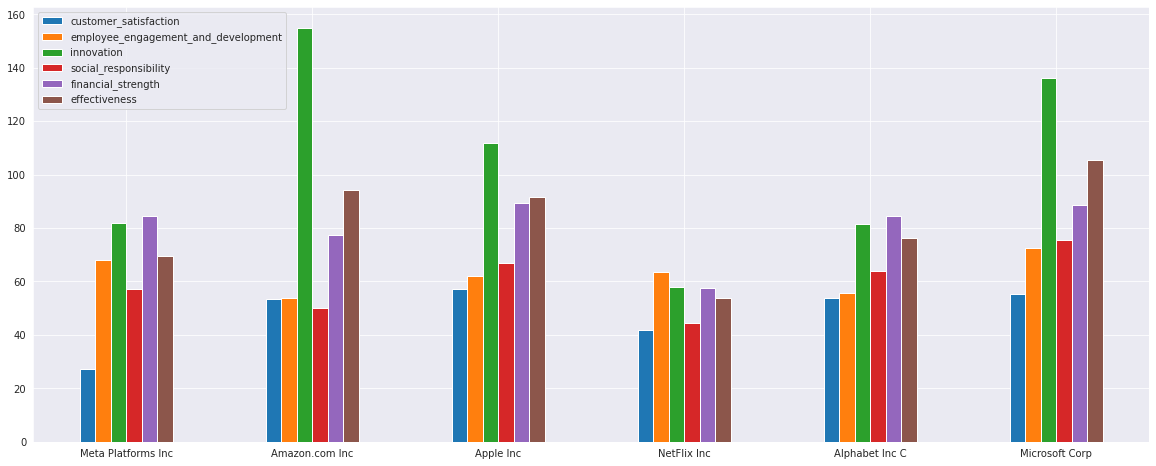

In [53]:
import numpy as np
MAANGM_df.plot(kind='bar')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5],labels=MAANGM_df.company, rotation='horizontal')

The highest scores for all the MAANGM companies are as follows:
- Customer Satisfaction:  Apple
- Employee Engagement and Development:  Microsoft
- Innovation:  Amazon
- Social Responsibility:  Microsoft
- Financial Strength:  Apple
- Effectiveness:  Amazon

Amazon's massive innovation score is what brought its overall effectiveness beyond all the other companies. This innovation score may be due to its combination of ecommerce and AWS enterprise solutions. Meta (Facebook), Netflix, and Alphabet (Google) all did not score first place in any category. Interesting findings include Meta being the lowest in customer satisfaction, possibly due to its information and political scandals, and Amazon having the lowest employee engagement and development score, possibly to due its working conditions for warehouse and delivery workers.

## Inferences and Conclusion

In conclusion, most of the top tech MAANGM companies scored the highest overall, making them the best companies for 2021. However, the MAANGM companies did not score the highest in every single category. Rather, companies in internet services, big data, financial services, medical, and consumer goods scored higher than some of the top tech companies. 

Some interesting findings are that when employees are more engaged and developed in their careers, customers are more satisfied, as well as when companies care more about social responsibility, innovation increases. Companies can still have relatively higher customer satisfaction without caring about social responsibility as much. A notable mention is that a company with one of the largest market caps like Tesla scored significantly lower than the top tech companies. Another notable mention is that, aside from Microsoft, the top tech MAANGM companies scored lower in employee engagement and development than other companies.

An important note is that the data collected is still relatively subjective. Some top companies may be good to work in for compensation but perhaps not for career growth, some lesser known companies may also be good places to work. Overall, how an individual views each company is based on their own circumstances, career goals, and interests. 

## References and Future Work

A future idea would be seeing updated scores for 2022 and beyond, and how the companies have changed over time. It would be interesting to see if there are new top companies in the future.

Some resources that are useful are included here:
- https://jovian.ai/aakashns/python-matplotlib-data-visualization
- https://jovian.ai/multiplexpcr/zerotopandas-course-project-pokemon